In [41]:
import logging
import pickle
import numpy as np

In [42]:
from instance import Instance, InfeasibleOnBuilding
from FINAL_src_CG_basic import ColumnGeneration

In [43]:
def setup_logger(name, log_file, level):

    formatter = logging.Formatter('%(levelname)s %(message)s')
    handler = logging.FileHandler(log_file, mode='w')        
    handler.setFormatter(formatter)

    logger = logging.getLogger(name)
    logger.setLevel(level)
    logger.addHandler(handler)

    return logger

In [44]:
with open('instances_dataset_FINAL.pickle', 'rb') as f:
   instances = pickle.load(f)

with open('rnr_feasible_instances_indexes.pickle', 'rb') as f:
   indexes = pickle.load(f)

In [ ]:
for network_size in indexes:
        
    for idx in indexes[network_size]:

        # if idx != 93: #< 554:
        #     continue

        i = instances[idx]

        network_filename, network_rp_filename, app_merged, app_merged_rp, app_filenames, app_rp_filenames = i
        print(f"{idx} {len(app_filenames)} apps, {network_rp_filename} {app_merged}")
        

        # try:
        #     instance = Instance.build(
        #         network_filename, 
        #         network_rp_filename, 
        #         app_merged, 
        #         app_merged_rp
        #     )
        # except InfeasibleOnBuilding:
        #     print("INFEASIBLE on building")
        #     continue

        
        logger = setup_logger(f"logger_{idx:03d}", f"logs/id_{idx:04d}.log", logging.DEBUG)
        
        try:
            cg = ColumnGeneration(
                N= len(app_filenames),
                filenames= (
                    network_filename, network_rp_filename, 
                    app_filenames, app_rp_filenames
                ),
                logger= logger
            )
            result = cg.execute()
            #master_objs, lagrangean_objs = cg.execute()
        except Exception as e:
            print(f"ERROR in ColumnGeneration : {e}")
            raise RuntimeError()
        
        
        # print()
        # print(f"dual {result[0]} primal {result[1]}")

        # CG_DUAL_BOUND[idx] = result[0]
        # CG_PRIMAL_BOUND[idx] = result[1]
        # CG_TIME[idx] = result[2]
    
        print("\n" + "-" * 80 + "\n")

0 2 apps, DATASET_2/networks/network_030_a_rp_0.dat DATASET_2/apps_merged_FINAL/id_0000.dat

STOP, gap < 0.1 %
#iterations 3 LR_dual_bound 410.27598322566024 CG_time 1.622

--------------------------------------------------------------------------------

1 2 apps, DATASET_2/networks/network_030_a_rp_4.dat DATASET_2/apps_merged_FINAL/id_0001.dat

STOP, gap < 0.1 %
#iterations 6 LR_dual_bound 570.2159775190687 CG_time 0.189

--------------------------------------------------------------------------------

2 2 apps, DATASET_2/networks/network_030_a_rp_4.dat DATASET_2/apps_merged_FINAL/id_0002.dat

STOP, gap < 0.1 %
#iterations 8 LR_dual_bound 940.6254739034483 CG_time 0.646

--------------------------------------------------------------------------------

3 3 apps, DATASET_2/networks/network_030_c_rp_0.dat DATASET_2/apps_merged_FINAL/id_0003.dat

STOP, gap < 0.1 %
#iterations 6 LR_dual_bound 695.2447040450787 CG_time 0.607

-----------------------------------------------------------------

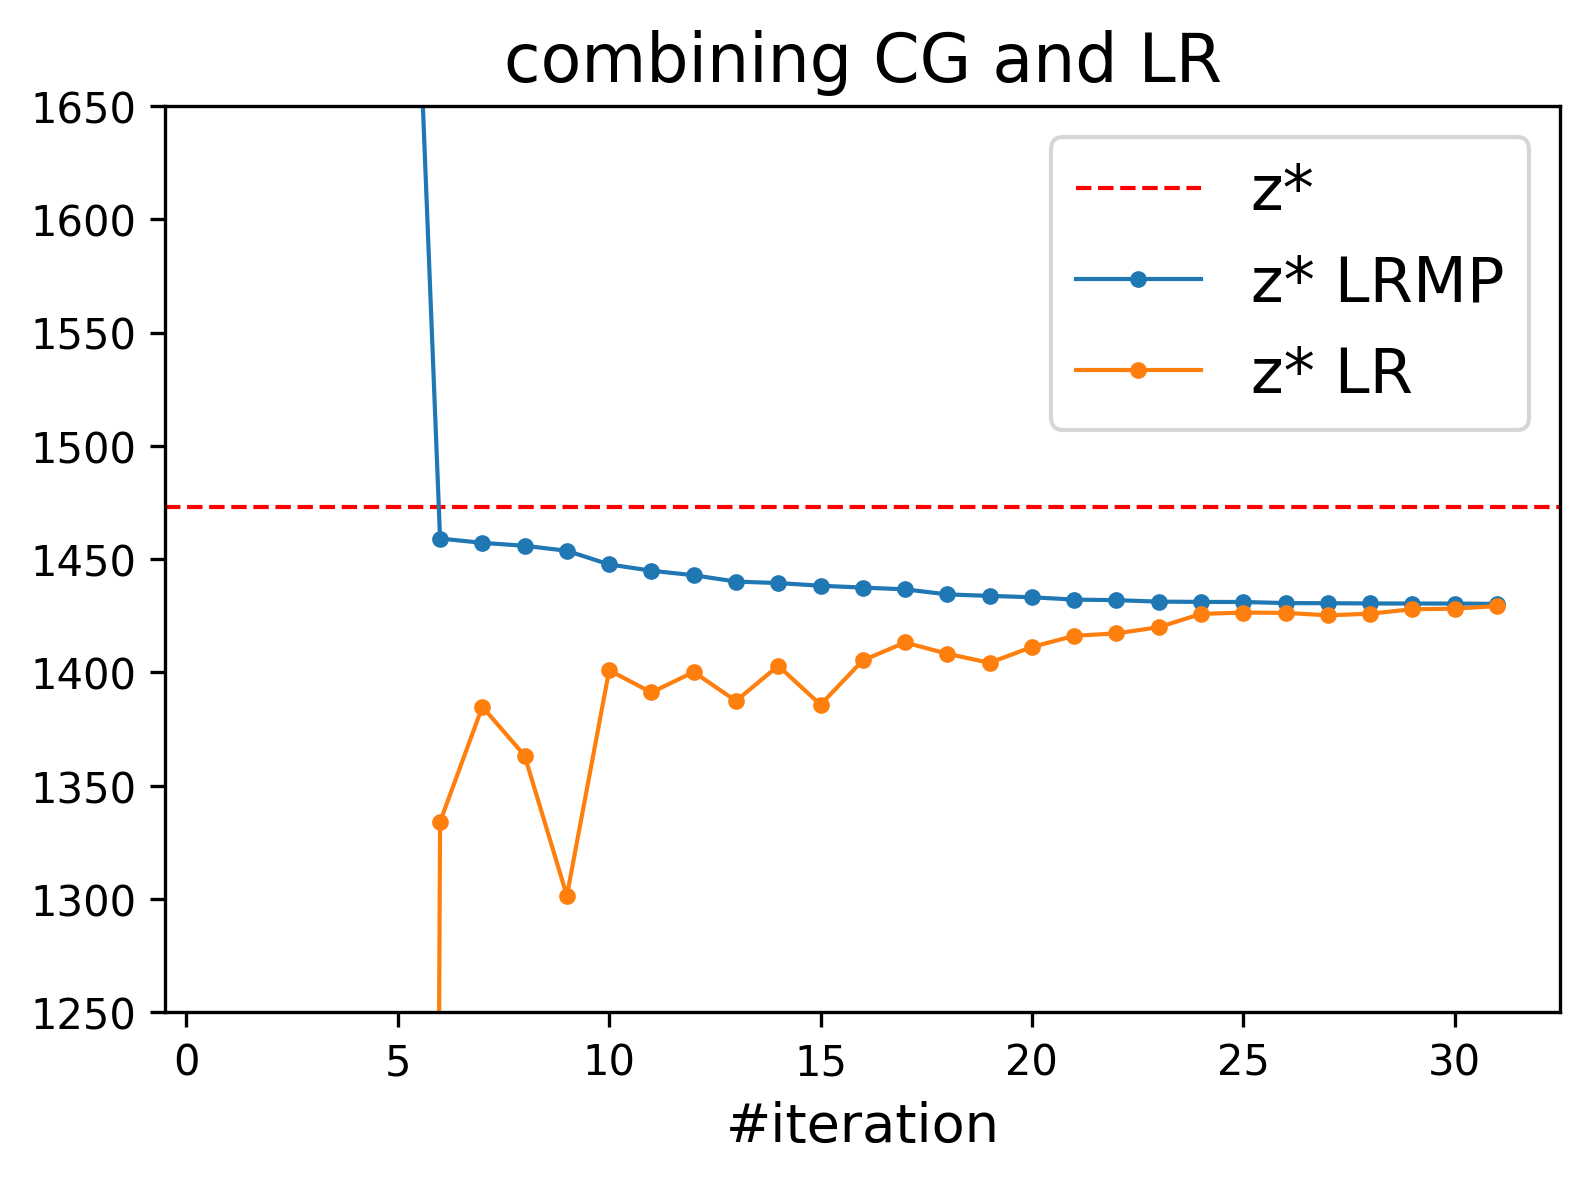

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np


# plt.figure(dpi=300)
# iter = list(range(1,len(master_objs)+1))
# plt.axhline(y=1473, color='r', linestyle='--',label='z*', linewidth='1')
# plt.plot(iter,   master_objs, label='z* LRMP', linewidth='1', marker='.')
# plt.plot(iter,   lagrangean_objs, label='z* LR', linewidth='1', marker='.')
# plt.ylim(((1250,1650)))

# plt.title("combining CG and LR", fontsize=16)
# plt.xlabel("#iteration",fontsize=13)
# plt.legend(fontsize=15)

# plt.savefig('tailing.png', dpi=300)
# plt.show()